## Apply best model to larger sample of Telegram messages

Using the data initially selected for annotation.

## Load pretrained model

In [1]:
from transformers import AutoTokenizer, AutoModelForTokenClassification

best_model_path = "../../../../models/deepset/gbert-base-sm_tg_combined-10_epochs_2022_07_10/checkpoint-932"
pretrained_tokenizer = AutoTokenizer.from_pretrained(best_model_path,local_files_only=True)
pretrained_model = AutoModelForTokenClassification.from_pretrained(best_model_path,local_files_only=True)

/home/eli/envs/bt/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## Initialize NER pipeline with pretrained model and 

In [2]:
from transformers import pipeline

ner_pipe = pipeline('ner', model=pretrained_model, tokenizer=pretrained_tokenizer, device=0)

# Load Telegram messages 

In [56]:
import pandas as pd
df_origin = pd.read_csv('/home/eli/data/data_for_annotation_2022_06_27.csv')

In [57]:
df_origin.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3634 entries, 0 to 3633
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Unnamed: 0    3634 non-null   int64 
 1   id            3634 non-null   object
 2   message_id    3634 non-null   int64 
 3   date          3634 non-null   object
 4   cleaned_text  3634 non-null   object
dtypes: int64(2), object(3)
memory usage: 142.1+ KB


## Apply pipeline to sample messages to get NER predictions

In [6]:
# df['detected_entities'] = df.cleaned_text.apply(lambda x: ner_pipe(x))

/home/eli/envs/bt/lib/python3.8/site-packages/transformers/pipelines/base.py:1012: UserWarning: You seem to be using the pipelines sequentially on GPU. In order to maximize efficiency please use a dataset
  warnings.warn(


## Explore results

The pipeline returns the model's prediction for each subtoken:

In [12]:
idx = 5
print(f"TEXT: {df.loc[idx, 'cleaned_text']}\n\nDETECTED ENTITIES: {df.loc[idx, 'detected_entities']}")

TEXT: Stuttgart Dobelstrasse 11.8.2021 Schilderaktion Raus auf die Straße @Demotermine!

DETECTED ENTITIES: [{'entity': 'B-LOC', 'score': 0.99383014, 'index': 1, 'word': 'Stuttgart', 'start': 0, 'end': 9}, {'entity': 'B-LOC', 'score': 0.9602573, 'index': 2, 'word': 'Dob', 'start': 10, 'end': 13}, {'entity': 'I-LOC', 'score': 0.8823936, 'index': 3, 'word': '##els', 'start': 13, 'end': 16}, {'entity': 'I-LOC', 'score': 0.9282235, 'index': 4, 'word': '##tra', 'start': 16, 'end': 19}, {'entity': 'I-LOC', 'score': 0.9236474, 'index': 5, 'word': '##sse', 'start': 19, 'end': 22}, {'entity': 'B-DATE', 'score': 0.97915435, 'index': 6, 'word': '11', 'start': 23, 'end': 25}, {'entity': 'I-DATE', 'score': 0.9675836, 'index': 7, 'word': '.', 'start': 25, 'end': 26}, {'entity': 'I-DATE', 'score': 0.97053087, 'index': 8, 'word': '8', 'start': 26, 'end': 27}, {'entity': 'I-DATE', 'score': 0.9341917, 'index': 9, 'word': '.', 'start': 27, 'end': 28}, {'entity': 'I-DATE', 'score': 0.9009711, 'index': 10,

### Save results

In [13]:
#df.to_csv('gbert_new_texts_results.csv')

In [140]:
import pandas as pd
df = pd.read_csv('gbert_new_texts_results.csv')

In [141]:
df[['date', 'cleaned_text', 'detected_entities']]

date                                       cleaned_text  \
0     2020-11-24 13:22:54  Corona-Maßnahmen sofort beenden , Existenzen e...   
1     2021-11-24 13:05:10  #Cremona #IT #Sa2711 Raus auf die Straßen @Dem...   
2     2021-12-14 22:31:13  #Karlsruhe #BW #Mo2012 #Mo2712 #montags Raus a...   
3     2021-07-21 00:04:38  Bristol 01082021 Overview https://t.me/Demoter...   
4     2021-09-15 04:51:29  Straßburg @ElsassInfoChat 18092021 Raus auf di...   
...                   ...                                                ...   
3629  2021-05-11 06:39:25  + + + Autocorso Wittenberg + + + 🚗 Samstag , d...   
3630  2021-12-08 11:40:27  Finger weg vom Ländle ! Am Samstagmorgen prote...   
3631  2021-10-16 11:23:58  #Stuttgart an der Uni Schilderdemo der Freien ...   
3632  2021-12-18 11:40:11  18.12.2021 Jülich - 242 - Gemeinsaum mehr erre...   
3633  2021-09-27 18:50:21  Ex General : „ Frankreich ist Opfer des U Boot...   

                                      detected_entities  
0     [{'entity': 'B-LOC', 'score': 0.9675006, 'inde...  
1     [{'entity': 'B-LOC', 'score': 0.9774843, 'inde...  
2     [{'entity': 'B-LOC', 'score': 0.9849097, 'inde...  
3                                                    []  
4     [{'entity': 'B-LOC', 'score': 0.97016734, 'ind...  
...                                                 ...  
3629  [{'entity': 'B-LOC', 'score': 0.978324, 'index...  
3630  [{'entity': 'B-LOC', 'score': 0.7454992, 'inde...  
3631  [{'entity': 'B-LOC', 'score': 0.9908772, 'inde...  
3632  [{'entity': 'B-DATE', 'score': 0.97540104, 'in...  
3633  [{'entity': 'B-ORG', 'score': 0.90439576, 'ind...  

[3634 rows x 3 columns]

#### Explore results for one example row

In [142]:
import ast

pd.DataFrame(ast.literal_eval(df.loc[3629, 'detected_entities']))

entity     score  index          word  start  end
0    B-LOC  0.978324      7    Wittenberg     16   26
1   B-DATE  0.980476     12       Samstag     35   42
2   I-DATE  0.830340     13             ,     43   44
3   I-DATE  0.727657     14           den     45   48
4   I-DATE  0.550722     15            15     49   51
5   I-DATE  0.981293     16             .     51   52
6   I-DATE  0.974602     17            05     52   54
7   I-DATE  0.939695     18             .     54   55
8   I-DATE  0.916711     19          2021     55   59
9   B-TIME  0.966351     21            16     62   64
10  I-TIME  0.777051     22             :     64   65
11  I-TIME  0.862039     23            30     65   67
12  I-TIME  0.911576     24           Uhr     68   71
13   B-LOC  0.542405     25  Hauptbahnhof     72   84
14   I-LOC  0.966599     26           Ost     85   88
15  B-TIME  0.956992     31            17    110  112
16  I-TIME  0.824525     32             :    112  113
17  I-TIME  0.867708     33            30    113  115
18  I-TIME  0.918817     34           Uhr    116  119
19   B-LOC  0.420535     48          ##tt    157  159
20   I-LOC  0.585116     49          ##en    159  161
21   I-LOC  0.768570     50        ##berg    161  165
22   B-LOC  0.419840     61             @    186  187
23   B-LOC  0.765218     62       Sachsen    187  194

### Method to adjust tagging, concatenate subtokens back to full tokens with their corresponding labels

In [143]:
def adjust_tagging(ner_results):
    
    # TODO: check score for B, treshold, e.g. remove all rows with treshold <= 0.7?
    # TODO: prevent ents to start with I? 

    ents_df = pd.DataFrame(ast.literal_eval(ner_results)) #
    tags = []
    words = []
    result = []
    entity_started = False

    
    for i in range(len(ents_df)):   
        
        prev_word = '' if i == 0 else ents_df.loc[i-1, 'word']
        prev_tag = '' if i == 0 else ents_df.loc[i-1, 'entity']

        curr_word = ents_df.loc[i, 'word']
        curr_tag = ents_df.loc[i, 'entity']            
        
        # adjust tagging for first word
        if i == 0 and curr_tag.startswith('I'):
            curr_tag = curr_tag.replace('I', 'B')
            
        # if subtoken is tagged as beginning of an entity, change to inside of an entity
        if curr_word.startswith('##') and curr_tag.startswith('B'):
            curr_tag = curr_tag.replace('B', 'I')
        
        # B = beginning of an entity -> store tag and first word of entity in words list
        if curr_tag.startswith('B'):
            tags.append(curr_tag.replace('B-', ''))
            words.append(curr_word)
            entity_started = True

        # I = curr word is inside of an entity -> get preceding word, combine with current word and store in words list
        if curr_tag.startswith('I') and entity_started:
            # remove ## added by tokenizer to obtain clean subtoken
            pred_word = words[-1]
            
            if '##' in curr_word:
                curr_word = curr_word.replace('##', '')
            elif curr_word[0].isupper():
                # to separate words in multi-word NEs, e.g. Jens Spahn
                curr_word = ' ' + curr_word
                
            word_to_add = pred_word + curr_word
            words[-1] = word_to_add

        result = zip(words, tags)
    
    return list(result)

In [144]:
df['detected_entities'] = df.detected_entities.apply(lambda x: adjust_tagging(x))

In [145]:
df[['date', 'cleaned_text', 'detected_entities']]

date                                       cleaned_text  \
0     2020-11-24 13:22:54  Corona-Maßnahmen sofort beenden , Existenzen e...   
1     2021-11-24 13:05:10  #Cremona #IT #Sa2711 Raus auf die Straßen @Dem...   
2     2021-12-14 22:31:13  #Karlsruhe #BW #Mo2012 #Mo2712 #montags Raus a...   
3     2021-07-21 00:04:38  Bristol 01082021 Overview https://t.me/Demoter...   
4     2021-09-15 04:51:29  Straßburg @ElsassInfoChat 18092021 Raus auf di...   
...                   ...                                                ...   
3629  2021-05-11 06:39:25  + + + Autocorso Wittenberg + + + 🚗 Samstag , d...   
3630  2021-12-08 11:40:27  Finger weg vom Ländle ! Am Samstagmorgen prote...   
3631  2021-10-16 11:23:58  #Stuttgart an der Uni Schilderdemo der Freien ...   
3632  2021-12-18 11:40:11  18.12.2021 Jülich - 242 - Gemeinsaum mehr erre...   
3633  2021-09-27 18:50:21  Ex General : „ Frankreich ist Opfer des U Boot...   

                                      detected_entities  
0                          [(@, LOC), (Stuttgart, LOC)]  
1                            [(#, LOC), (Cremona, LOC)]  
2     [(#, LOC), (Karlsruhe, LOC), (#, LOC), (BW, LOC)]  
3                                                    []  
4                                    [(Straßburg, LOC)]  
...                                                 ...  
3629  [(Wittenberg, LOC), (Samstag,den15.05.2021, DA...  
3630  [(L, LOC), (Samstagmorgen, DATE), (Heidelberg,...  
3631  [(#, LOC), (Stuttgart, LOC), (Freien Linken, O...  
3632  [(18.12.2021, DATE), (Jülich, LOC), (1, TIME),...  
3633  [(Ex General, ORG), (Frankreich, LOC), (Epoch ...  

[3634 rows x 3 columns]

## Parse date and time entities using ctparse

In [146]:
from ctparse import ctparse
from datetime import datetime


def parse_entities(detected_ents):
# https://ctparse.readthedocs.io/en/latest/ctparse.html#module-ctparse.types

    parsed_ents = []

    # Set timestamp of message as reference time
    #ts = df.loc[i, 'date']
    
    for ent in detected_ents:
        token, tag = ent
        #print(token, tag)
        
        if not (tag == 'DATE' or tag =='TIME'):
            parsed_ents.append((token, tag))
        
        else:
            #print(token)
            try: 
                parsed_date_time = ctparse(token)#, ts=ts)
                
                #print(parsed_date_time is not None)
                if tag == 'DATE': 
                    parsed_token = parsed_date_time.resolution.dt.strftime("%d.%m.%Y")
                elif tag == 'TIME':
                    parsed_token = parsed_date_time.resolution.dt.strftime("%HH:%MM")
                
                parsed_ents.append((parsed_token, tag))
           
            except: 
                parsed_ents.append((token, tag))
        
    #print(parsed_ents)
    return parsed_ents

In [147]:
df['parsed_entities'] = df.detected_entities.apply(lambda x: parse_entities(x))

Failed to produce result for "18092021"
Failed to produce result for "12122021"
Failed to produce result for "#"
Failed to produce result for "#"
Failed to produce result for "#"
Failed to produce result for "05102021"
Failed to produce result for "202106"
Failed to produce result for "Wochenende"
Failed to produce result for "Beginn"
Failed to produce result for "#"
Failed to produce result for "Anfangdes Jahres"
Failed to produce result for "1711"
Failed to produce result for "19092021"
Failed to produce result for "01082021"
Failed to produce result for "201914"
Failed to produce result for "Bern"
Failed to produce result for "kommende"
Failed to produce result for "Wochenende"
Failed to produce result for "Wochenende"
Failed to produce result for "Woensg"
Failed to produce result for "318"
Failed to produce result for "20210116"
Failed to produce result for "vor"
Failed to produce result for "heutigen"
Failed to produce result for "20092021"
Failed to produce result for "St. Nikola

In [148]:
df[['date', 'cleaned_text', 'detected_entities', 'parsed_entities']]

date                                       cleaned_text  \
0     2020-11-24 13:22:54  Corona-Maßnahmen sofort beenden , Existenzen e...   
1     2021-11-24 13:05:10  #Cremona #IT #Sa2711 Raus auf die Straßen @Dem...   
2     2021-12-14 22:31:13  #Karlsruhe #BW #Mo2012 #Mo2712 #montags Raus a...   
3     2021-07-21 00:04:38  Bristol 01082021 Overview https://t.me/Demoter...   
4     2021-09-15 04:51:29  Straßburg @ElsassInfoChat 18092021 Raus auf di...   
...                   ...                                                ...   
3629  2021-05-11 06:39:25  + + + Autocorso Wittenberg + + + 🚗 Samstag , d...   
3630  2021-12-08 11:40:27  Finger weg vom Ländle ! Am Samstagmorgen prote...   
3631  2021-10-16 11:23:58  #Stuttgart an der Uni Schilderdemo der Freien ...   
3632  2021-12-18 11:40:11  18.12.2021 Jülich - 242 - Gemeinsaum mehr erre...   
3633  2021-09-27 18:50:21  Ex General : „ Frankreich ist Opfer des U Boot...   

                                      detected_entities  \
0                          [(@, LOC), (Stuttgart, LOC)]   
1                            [(#, LOC), (Cremona, LOC)]   
2     [(#, LOC), (Karlsruhe, LOC), (#, LOC), (BW, LOC)]   
3                                                    []   
4                                    [(Straßburg, LOC)]   
...                                                 ...   
3629  [(Wittenberg, LOC), (Samstag,den15.05.2021, DA...   
3630  [(L, LOC), (Samstagmorgen, DATE), (Heidelberg,...   
3631  [(#, LOC), (Stuttgart, LOC), (Freien Linken, O...   
3632  [(18.12.2021, DATE), (Jülich, LOC), (1, TIME),...   
3633  [(Ex General, ORG), (Frankreich, LOC), (Epoch ...   

                                        parsed_entities  
0                          [(@, LOC), (Stuttgart, LOC)]  
1                            [(#, LOC), (Cremona, LOC)]  
2     [(#, LOC), (Karlsruhe, LOC), (#, LOC), (BW, LOC)]  
3                                                    []  
4                                    [(Straßburg, LOC)]  
...                                                 ...  
3629  [(Wittenberg, LOC), (15.05.2021, DATE), (16H:3...  
3630  [(L, LOC), (20.08.2022, DATE), (Heidelberg, LO...  
3631  [(#, LOC), (Stuttgart, LOC), (Freien Linken, O...  
3632  [(18.12.2021, DATE), (Jülich, LOC), (01H:00M, ...  
3633  [(Ex General, ORG), (Frankreich, LOC), (Epoch ...  

[3634 rows x 4 columns]

## Get results per text

In [149]:
for i in df[:10].index:
    print(f"TEXT:{df.loc[i, 'cleaned_text']}\nENTITIES:{df.loc[i, 'parsed_entities']}'\n\n")

TEXT:Corona-Maßnahmen sofort beenden , Existenzen erhalten ! @StuttgartGrundgesetzdemos @Corona_Reset
ENTITIES:[('@', 'LOC'), ('Stuttgart', 'LOC')]'


TEXT:#Cremona #IT #Sa2711 Raus auf die Straßen @Demotermine! 👉 Übersicht / Overview 👈
ENTITIES:[('#', 'LOC'), ('Cremona', 'LOC')]'


TEXT:#Karlsruhe #BW #Mo2012 #Mo2712 #montags Raus auf die Straßen @Demotermine! 👉 Übersicht / Overview 👈
ENTITIES:[('#', 'LOC'), ('Karlsruhe', 'LOC'), ('#', 'LOC'), ('BW', 'LOC')]'


TEXT:Bristol 01082021 Overview https://t.me/Demotermine/12847 Raus auf die Straße @Demotermine!
ENTITIES:[]'


TEXT:Straßburg @ElsassInfoChat 18092021 Raus auf die Straßen @Demotermine
ENTITIES:[('Straßburg', 'LOC')]'


TEXT:Stuttgart Dobelstrasse 11.8.2021 Schilderaktion Raus auf die Straße @Demotermine!
ENTITIES:[('Stuttgart', 'LOC'), ('Dobelstrasse', 'LOC'), ('11.08.2021', 'DATE')]'


TEXT:🇫 🇷 Paris Anspannung steigt 11.9.2021 @FranceResistanceNews Raus auf die Straßen @Demotermine
ENTITIES:[('Paris', 'LOC'), ('11.09.2021', 

## Get tokens per entity type

In [150]:
from collections import Counter 

def get_entities_and_entity_freqs_per_type(df, col='parsed_entities'):
    # dict to store words per entity type
    ents_per_type = {
    'LOC': [],
    'DATE': [],
    'TIME': [],
    'PER': [],
    'ACTION': [],
    'ORG': [],
    }

    words = []
    tags = []

    for i in df.index: 
        ents = df.loc[i, col]

        for ele in ents:
            word, tag = ele
            words.append(word)
            tags.append(tag)

            # store in results dict, only keep words with at least 2 characters to remove unusable results
            if len(word) > 1:
                ents_per_type[tag].append(word)
    
    freqs = Counter(tags)
    return ents_per_type, freqs

In [151]:
parsed_ents_per_type, freqs_parsed_ents = get_entities_and_entity_freqs_per_type(df)

In [152]:
freqs_parsed_ents

Counter({'LOC': 13656, 'DATE': 2453, 'ORG': 1926, 'TIME': 3973, 'PER': 1513})

In [153]:
detected_ents_per_type, freqs_detected_ents = get_entities_and_entity_freqs_per_type(df, col='detected_entities')

In [154]:
freqs_detected_ents

Counter({'LOC': 13656, 'DATE': 2453, 'ORG': 1926, 'TIME': 3973, 'PER': 1513})

## Most common ents per type (parsed entities)

In [155]:
Counter(sorted(detected_ents_per_type['LOC'])).most_common(20)

[('DE', 636),
 ('Berlin', 572),
 ('Stuttgart', 241),
 ('Bayern', 142),
 ('Deutschland', 140),
 ('München', 116),
 ('Nürnberg', 116),
 ('Wien', 115),
 ('Sachsen', 90),
 ('Dresden', 84),
 ('Leipzig', 80),
 ('Hamburg', 72),
 ('Österreich', 71),
 ('Schweiz', 70),
 ('Baden', 65),
 ('Rostock', 65),
 ('Augsburg', 64),
 ('Niedersachsen', 60),
 ('Düsseldorf', 59),
 ('Frankfurt', 56)]

In [156]:
Counter(sorted(detected_ents_per_type['PER'])).most_common(20)

[('Karl Hilz', 26),
 ('Merkel', 25),
 ('Kretschmer', 23),
 ('Scholz', 15),
 ('Karl', 14),
 ('Nicole Hammer', 14),
 ('Spahn', 14),
 ('Sven Liebich', 14),
 ('Markus Haintz', 13),
 ('Ralf Ludwig', 13),
 ('Alexander Ehrlich', 12),
 ('Michael Ballweg', 12),
 ('Cor', 10),
 ('Jens Spahn', 10),
 ('Olaf Scholz', 9),
 ('Sabine Seibold', 9),
 ('Söder', 9),
 ('Laschet', 8),
 ('MarcoKurz', 8),
 ('Markus Huck B. P.', 8)]

In [157]:
Counter(sorted(detected_ents_per_type['ORG'])).most_common(20)

[('Teleg', 130),
 ('Facebook', 55),
 ('Twitter', 44),
 ('YouTube', 31),
 ('CDU', 28),
 ('SPD', 28),
 ('Epoch Times Nachrichten', 27),
 ('Cor', 26),
 ('AfD', 21),
 ('Instagram', 18),
 ('Freie Jugend', 14),
 ('Baden', 11),
 ('Epoch Times', 11),
 ('ARD', 10),
 ('Pay', 10),
 ('Grünen', 9),
 ('Anti', 8),
 ('Bundesver', 8),
 ('Freiejugend', 8),
 ('Google', 8)]

In [158]:
Counter(sorted(detected_ents_per_type['DATE'])).most_common(20)

[('Montag', 76),
 ('Samstag', 76),
 ('Sonntag', 42),
 ('2021', 40),
 ('Heute', 40),
 ('29.08.2021', 35),
 ('Donnerstag', 32),
 ('28.08.2021', 26),
 ('Mittwoch', 26),
 ('Freitag', 25),
 ('20.11.2021', 20),
 ('01.08.2021', 18),
 ('Dienstag', 16),
 ('Wochenende', 16),
 ('heute', 16),
 ('06.12.', 15),
 ('Sa', 15),
 ('04.12.2021', 14),
 ('2020', 12),
 ('27.11.2021', 12)]

In [159]:
Counter(sorted(detected_ents_per_type['TIME'])).most_common(20)

[('18:00', 160),
 ('18', 150),
 ('19:00', 141),
 ('19:00 Uhr', 118),
 ('19 Uhr', 112),
 ('14:00', 108),
 ('19', 107),
 ('18 Uhr', 101),
 ('15:00 Uhr', 91),
 ('15:30 Uhr', 90),
 ('17', 86),
 ('15:00', 77),
 ('17:00', 74),
 ('18:00 Uhr', 74),
 ('15', 65),
 ('14', 59),
 ('14:00 Uhr', 49),
 ('13', 44),
 ('18:30', 44),
 ('16:00', 43)]

In [160]:
Counter(sorted(detected_ents_per_type['ACTION'])).most_common(20)

[]

## Most common ents per type (parsed entities)

In [161]:
Counter(sorted(parsed_ents_per_type['LOC'])).most_common(20)

[('DE', 636),
 ('Berlin', 572),
 ('Stuttgart', 241),
 ('Bayern', 142),
 ('Deutschland', 140),
 ('München', 116),
 ('Nürnberg', 116),
 ('Wien', 115),
 ('Sachsen', 90),
 ('Dresden', 84),
 ('Leipzig', 80),
 ('Hamburg', 72),
 ('Österreich', 71),
 ('Schweiz', 70),
 ('Baden', 65),
 ('Rostock', 65),
 ('Augsburg', 64),
 ('Niedersachsen', 60),
 ('Düsseldorf', 59),
 ('Frankfurt', 56)]

In [162]:
Counter(sorted(parsed_ents_per_type['PER'])).most_common(20)

[('Karl Hilz', 26),
 ('Merkel', 25),
 ('Kretschmer', 23),
 ('Scholz', 15),
 ('Karl', 14),
 ('Nicole Hammer', 14),
 ('Spahn', 14),
 ('Sven Liebich', 14),
 ('Markus Haintz', 13),
 ('Ralf Ludwig', 13),
 ('Alexander Ehrlich', 12),
 ('Michael Ballweg', 12),
 ('Cor', 10),
 ('Jens Spahn', 10),
 ('Olaf Scholz', 9),
 ('Sabine Seibold', 9),
 ('Söder', 9),
 ('Laschet', 8),
 ('MarcoKurz', 8),
 ('Markus Huck B. P.', 8)]

In [163]:
Counter(sorted(parsed_ents_per_type['ORG'])).most_common(20)

[('Teleg', 130),
 ('Facebook', 55),
 ('Twitter', 44),
 ('YouTube', 31),
 ('CDU', 28),
 ('SPD', 28),
 ('Epoch Times Nachrichten', 27),
 ('Cor', 26),
 ('AfD', 21),
 ('Instagram', 18),
 ('Freie Jugend', 14),
 ('Baden', 11),
 ('Epoch Times', 11),
 ('ARD', 10),
 ('Pay', 10),
 ('Grünen', 9),
 ('Anti', 8),
 ('Bundesver', 8),
 ('Freiejugend', 8),
 ('Google', 8)]

In [164]:
Counter(sorted(parsed_ents_per_type['DATE'])).most_common(20)

[('20.08.2022', 122),
 ('17.08.2022', 103),
 ('22.08.2022', 94),
 ('18.08.2022', 64),
 ('21.08.2022', 64),
 ('29.08.2021', 45),
 ('2021', 40),
 ('19.08.2022', 39),
 ('24.08.2022', 38),
 ('28.08.2021', 35),
 ('01.08.2021', 34),
 ('04.12.2021', 25),
 ('23.08.2022', 25),
 ('20.11.2021', 23),
 ('06.12.2022', 21),
 ('06.11.2021', 19),
 ('27.11.2021', 17),
 ('28.08.2022', 17),
 ('11.12.2021', 16),
 ('18.09.2021', 16)]

In [165]:
Counter(sorted(parsed_ents_per_type['TIME'])).most_common(20)

[('18H:00M', 578),
 ('19H:00M', 545),
 ('15H:00M', 307),
 ('14H:00M', 296),
 ('17H:00M', 268),
 ('15H:30M', 173),
 ('16H:00M', 155),
 ('13H:00M', 135),
 ('18H:30M', 115),
 ('00H:00M', 113),
 ('11H:00M', 98),
 ('12H:00M', 90),
 ('17H:30M', 89),
 ('10H:00M', 86),
 ('01H:00M', 79),
 ('14H:30M', 65),
 ('02H:00M', 62),
 ('03H:00M', 44),
 ('16H:30M', 33),
 ('04H:00M', 32)]

In [166]:
Counter(sorted(parsed_ents_per_type['ACTION'])).most_common(20)

[]

# Wordclouds per entity type

In [238]:
from os import path
import numpy as np
from wordcloud import WordCloud
from collections import Counter 
from PIL import Image
import matplotlib.pyplot as plt

# read the mask image, taken from https://www.vecteezy.com/vector-art/6631360-coronavirus-stencil-molecule-covid-19
corona_mask = np.array(Image.open('/home/eli/data/vecteezy_coronavirus_stencil.jpg'))

# circle mask
x, y = np.ogrid[:500, :500]
circle_mask = (x - 250) ** 2 + (y - 250) ** 2 > 240 ** 2
circle_mask = 255 * circle_mask.astype(int)

def generate_word_cloud(ents_per_type, entity_type, fig_name, mask=circle_mask, collocations=True):
    
    data = Counter(ents_per_type[entity_type])
        
    wc_dates = WordCloud(
        collocations=collocations, 
        width=800, 
        height=800,
        background_color="white", 
        max_words=100, 
        mask=mask, 
        contour_width=3, 
        contour_color='steelblue'
    ).generate_from_frequencies(data)
    
    plt.figure(figsize=(20,10))
    plt.tight_layout(pad=0)
    plt.imshow(wc_dates, cmap=plt.cm.gray, interpolation='bilinear')
    plt.axis("off")
    plt.savefig(fig_name + '.png')
    plt.show()

## Person names

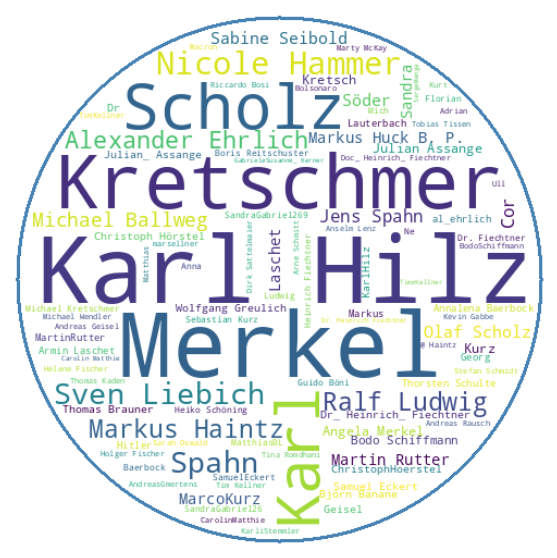

In [239]:
generate_word_cloud(detected_ents_per_type, 'PER', fig_name='person_ents')

## Location names

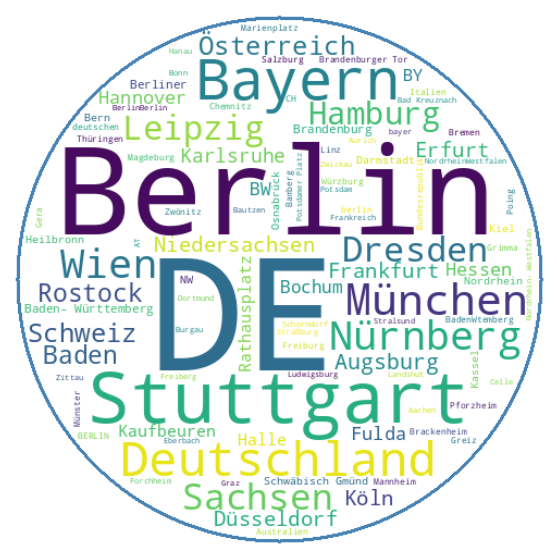

In [240]:
generate_word_cloud(detected_ents_per_type, 'LOC', fig_name='location_ents')

## Organization names

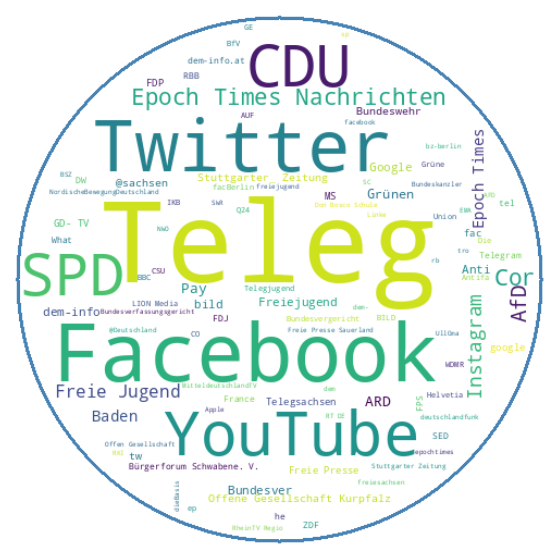

In [241]:
generate_word_cloud(detected_ents_per_type, 'ORG', 'org_ents')

## Date mentions

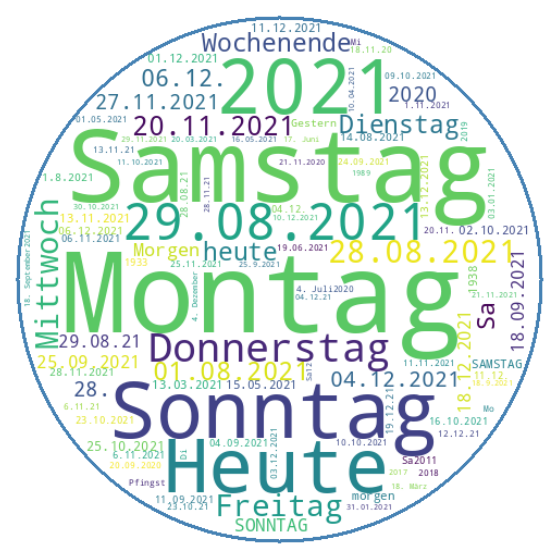

In [242]:
generate_word_cloud(detected_ents_per_type, 'DATE', 'date_ents')

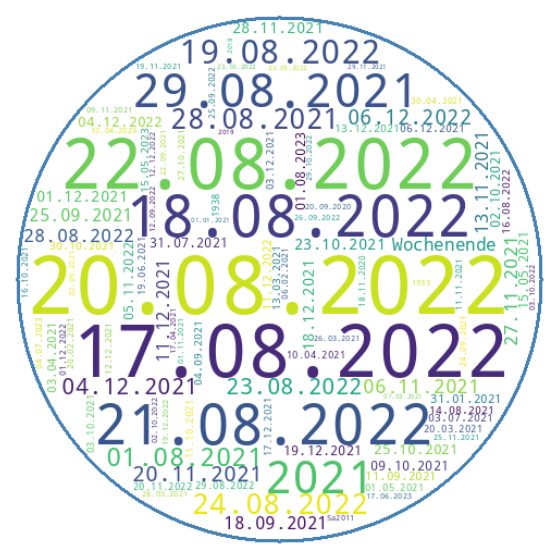

In [243]:
generate_word_cloud(parsed_ents_per_type, 'DATE', 'date_ents_parsed')

## Time mentions

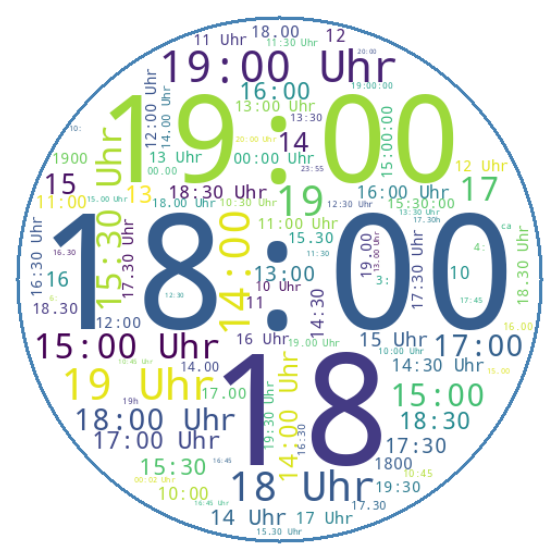

In [244]:
generate_word_cloud(detected_ents_per_type, 'TIME', 'time_ents')

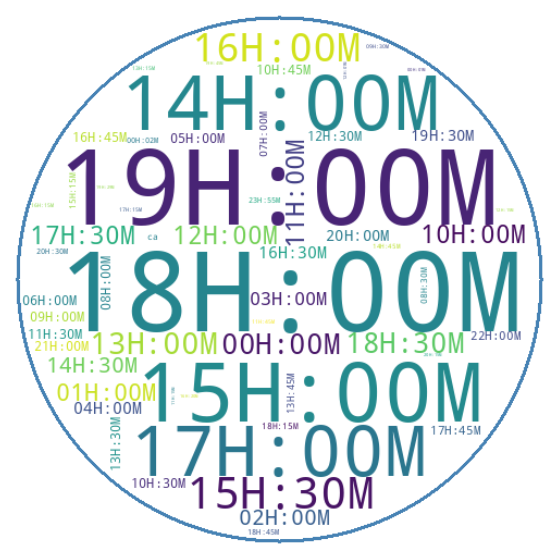

In [245]:
generate_word_cloud(parsed_ents_per_type, 'TIME', 'time_ents_parsed')